    Compiled by 
    Alem Fitwi
        Binghamton, NY
        Year: 2020

# Python Image Processing Tutorial (Using OpenCV)
https://likegeeks.com/python-image-processing/

- OpenCV is a free open source library used in real-time image processing. 
- It’s used to process images, videos, and even live streams, but in this tutorial, we will process images only as a first step. Before getting started, let’s install OpenCV.

               !pip install opencv-python

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### 1. Read an Image
       img = cv2.imread("./figs/lenna.jpg") # cv2.IMREAD_COLOR, default
       img = cv2.imread("./figs/lenna.jpg", 1) # cv2.IMREAD_COLOR
       img = cv2.imread("./figs/lenna.jpg", 0) # cv2.IMREAD_GRAYSCALE
       img = cv2.imread("./figs/lenna.jpg", -1) # cv2.IMREAD_UNCHANGED, including the alpha channel

In [3]:
img = cv2.imread("./figs/lenna.jpg", 1)

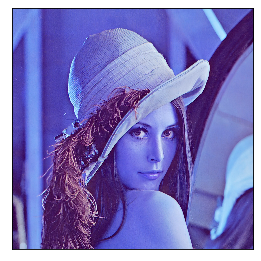

In [4]:
plt.figure(figsize=(4, 4), dpi=80)
plt.imshow(img)
plt.xticks([]), 
plt.yticks([])
plt.show()

In [5]:
img.shape

(1200, 1200, 3)

In [6]:
img.shape[:2]

(1200, 1200)

In [7]:
H, W = img.shape[0:2]

In [8]:
print(type(img))

<class 'numpy.ndarray'>


In [9]:
cv2.imshow('Original Image', img) 
cv2.waitKey(0)
cv2.destroyAllWindows()

### 2. Rotate Image
- Center: center of image
- Angle: amount of CW/CCW rotation
- Scale: How many times larger or smaller

In [10]:
img = cv2.imread("./figs/lenna.jpg", 1)
H, W = img.shape[0:2]
center, angle, scale = (W/2, H/2), 90, 1
rotationMatrix = cv2.getRotationMatrix2D(center, angle, scale)
rotatedImage = cv2.warpAffine(img, rotationMatrix, (W, H))
cv2.imshow('Rotated Image', rotatedImage)
cv2.waitKey(0)
cv2.destroyAllWindows()

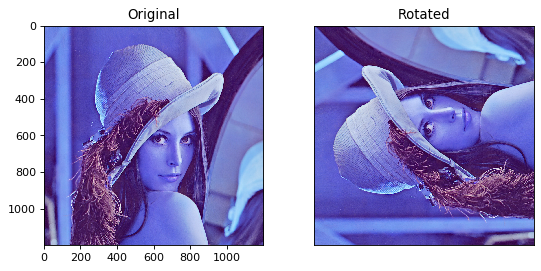

In [11]:
plt.figure(figsize=(8, 8), dpi=80)

plt.subplot(2,2,1), 
plt.imshow(img), 
plt.title('Original')

plt.subplot(2,2,2),
plt.imshow(rotatedImage),
plt.title('Rotated')

plt.xticks([]), 
plt.yticks([])

plt.show()

### 3. Crop an Image

In [12]:
img = cv2.imread("./figs/lenna.jpg", 1)
H, W = img.shape[0:2]

startRow = int(H*.15)
startCol = int(W*.15)
endRow = int(H*.85)
endCol = int(W*.85)

croppedImage = img[startRow:endRow, startCol:endCol]

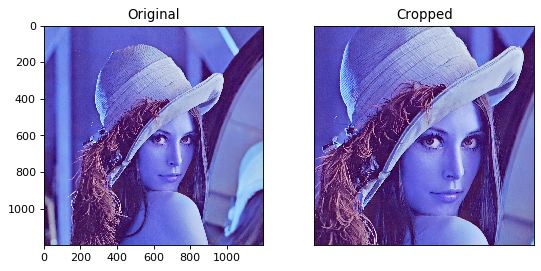

In [13]:
 plt.figure(figsize=(8, 8), dpi=80)

plt.subplot(2,2,1), 
plt.imshow(img), 
plt.title('Original')

plt.subplot(2,2,2),
plt.imshow(croppedImage),
plt.title('Cropped')

plt.xticks([]), 
plt.yticks([])

plt.show()

### 4. Resize an Image


In [14]:
img = cv2.imread("./figs/lenna.jpg", 1)
H, W = img.shape[0:2]


Resized1 = cv2.resize(img, (0,0), fx=0.75, fy=0.75)


In [15]:
img = cv2.imread("./figs/lenna.jpg", 1)
H, W = img.shape[0:2]


Resized2 = cv2.resize(img, (400,400))

cv2.imshow('Resized2', Resized2)
cv2.waitKey(0)
cv2.destroyAllWindows()

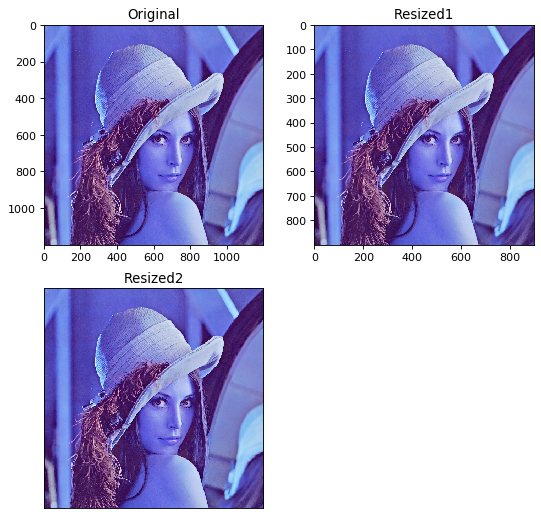

In [16]:
 plt.figure(figsize=(8, 8), dpi=80)

plt.subplot(2,2,1), 
plt.imshow(img), 
plt.title('Original')

plt.subplot(2,2,2),
plt.imshow(Resized1),
plt.title('Resized1')

plt.subplot(2,2,3),
plt.imshow(Resized2),
plt.title('Resized2')

plt.xticks([]), 
plt.yticks([])

plt.show()

### 5. Adjust Image Contrast
- According to Wikipedia, Contrast is the difference in luminance or color that makes an object distinguishable from other objects within the same field of view.

- new_img = a * img + b
- cv2.addWeighted(source_img1, alpha1, source_img2, alpha2, beta)

In [17]:
img = cv2.imread("./figs/lenna.jpg", 1)
contrast_img = cv2.addWeighted(img, 2.5, np.zeros(img.shape, img.dtype), 0, 0)


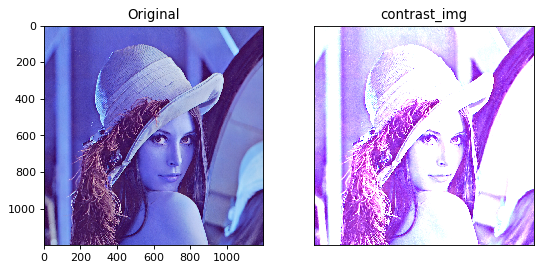

In [18]:
 plt.figure(figsize=(8, 8), dpi=80)

plt.subplot(2,2,1), 
plt.imshow(img), 
plt.title('Original')

plt.subplot(2,2,2),
plt.imshow(contrast_img),
plt.title('contrast_img')

plt.xticks([]), 
plt.yticks([])

plt.show()

### 6. Make an image blurry
- Remove outliers
- If a blurred image is observed carefully then a common thing to notice is that image is smooth meaning edges are not observed. A filter used for blurring is also called low pass filter, because it allows low frequency to enter and stop high frequency. Here frequency means the change of pixel value. Around edge pixel value changes rapidly as blur image is smooth so high frequency should be filtered out.
- For blur purpose a filter with every call having value 1 is used because to blur image a pixel value should be close to neighbor value.
In filter it is divided by 9 for normalization otherwise value of a pixel will increase resulting in more contrast which is not the goal.
#### 6.1 Gaussian Blur/Gaussian smoothing
- To reduce noise and details
- To make an image blurry, you can use the GaussianBlur() method of OpenCV.
- The GaussianBlur() uses the Gaussian kernel. The height and width of the kernel should be a positive and an odd number.
- Then you have to specify the X and Y direction that is sigmaX and sigmaY respectively. If only one is specified, both are considered the same.

In [19]:
img = cv2.imread("./figs/lenna.jpg", 1)
blur_image = cv2.GaussianBlur(img, (7,7), 0)

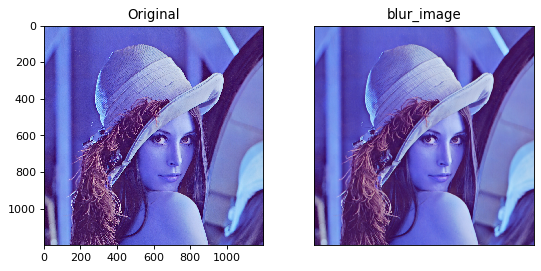

In [20]:
plt.figure(figsize=(8, 8), dpi=80)

plt.subplot(2,2,1), 
plt.imshow(img), 
plt.title('Original')

plt.subplot(2,2,2),
plt.imshow(blur_image),
plt.title('blur_image')

plt.xticks([]), 
plt.yticks([])

plt.show()

#### 6.2 Median Blur
- In median blurring, the median of all the pixels of the image is calculated inside the kernel area. The central value is then replaced with the resultant median value. Median blurring is used when there are **salt and pepper noise in the image**.

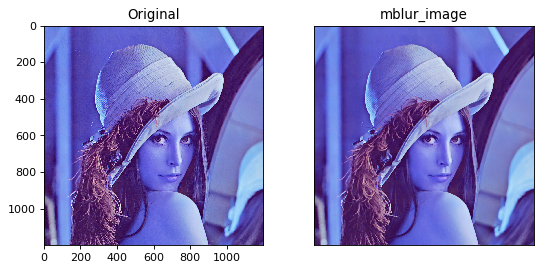

In [21]:
img = cv2.imread("./figs/lenna.jpg", 1)
mblur_image = cv2.medianBlur(img, 5) # applies 50% noise

plt.figure(figsize=(8, 8), dpi=80)

plt.subplot(2,2,1), 
plt.imshow(img), 
plt.title('Original')

plt.subplot(2,2,2),
plt.imshow(mblur_image),
plt.title('mblur_image')

plt.xticks([]), 
plt.yticks([])

plt.show()

### 7. Detect Edges
- To detect the edges in an image, you can use the Canny() method of cv2 which implements the Canny edge detector. - The Canny edge detector is also known as the optimal detector.

            cv2.Canny(image, minVal, maxVal)
- minVal and maxVal are the minimum and maximum intensity gradient values respectively.

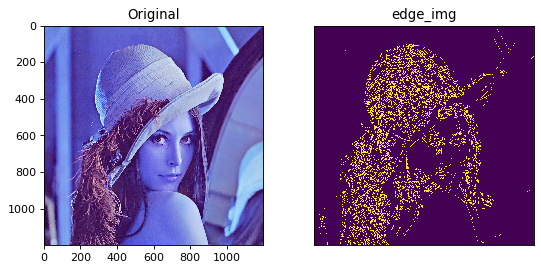

In [22]:
img = cv2.imread("./figs/lenna.jpg", 1)
edge_img = cv2.Canny(img,0,255)

plt.figure(figsize=(8, 8), dpi=80)

plt.subplot(2,2,1), 
plt.imshow(img), 
plt.title('Original')

plt.subplot(2,2,2),
plt.imshow(edge_img),
plt.title('edge_img')

plt.xticks([]), 
plt.yticks([])

plt.show()

### 8. Convert image to grayscale (Black & White)
- The easy way to convert an image in grayscale is to load it like this:
    - cv2.imread("./figs/lenna.jpg", 0)
    - cv2.imread("./figs/lenna.jpg", cv2.IMREAD_GRAYSCALE)
    - cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

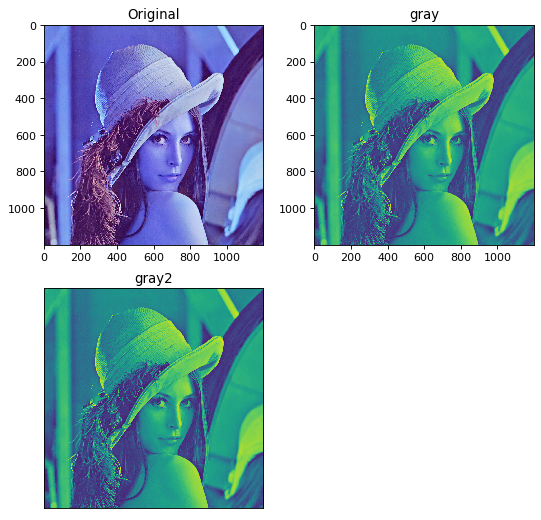

In [23]:
img = cv2.imread("./figs/lenna.jpg", 1)
gray = cv2.imread("./figs/lenna.jpg", 0)
gray2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(8, 8), dpi=80)

plt.subplot(2,2,1), 
plt.imshow(img), 
plt.title('Original')

plt.subplot(2,2,2),
plt.imshow(gray),
plt.title('gray')

plt.subplot(2,2,3),
plt.imshow(gray2),
plt.title('gray2')


plt.xticks([]), 
plt.yticks([])

plt.show()

### 9. Centroid (Center of blob) detection
- To find the center of an image, the first step is to convert the original image into grayscale. We can use the cvtColor() method of cv2 as we did before.
- Then we need to calculate the x and y coordinates of the center of the image by using the moments that we got above:



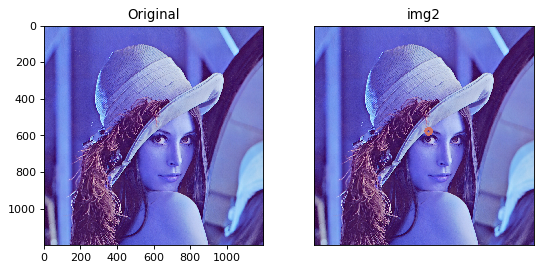

In [24]:
img = cv2.imread("./figs/lenna.jpg", 1)
img2 = cv2.imread("./figs/lenna.jpg", 1)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
moment = cv2.moments(gray)
X = int(moment ["m10"] / moment["m00"])
Y = int(moment ["m01"] / moment["m00"])
cv2.circle(img2, (X, Y), 15, (205, 114, 101), 15)

plt.figure(figsize=(8, 8), dpi=80)

plt.subplot(2,2,1), 
plt.imshow(img), 
plt.title('Original')

plt.subplot(2,2,2),
plt.imshow(img2),
plt.title('img2')

plt.xticks([]), 
plt.yticks([])

plt.show()

### 10. Apply a mask for a colored image
- Image masking means to apply some other image as a mask on the original image or to change the pixel values in the image.
- To apply a mask on the image, we will use the HoughCircles() method of the OpenCV module. The HoughCircles() method detects the circles in an image. After detecting the circles, we can simply apply a mask on these circles.
- The HoughCircles() method takes the original image, the Hough Gradient (which detects the gradient information in the edges of the circle), and the information from the following circle equation:

In [49]:
img = cv2.imread("./figs/lenna.jpg", 1)
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_img = cv2.medianBlur(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), 3)
circles = cv2.HoughCircles(gray_img, cv2.HOUGH_GRADIENT, 1, 20, param1=50, 
                           param2=50, minRadius=0, maxRadius=0)
circles = np.uint16(np.around(circles))

masking=np.full((img1.shape[0], img1.shape[1]),0,dtype=np.uint8)

In [ ]:
for j in circles[0, :]:
    cv2.circle(masking, (j[0], j[1]), j[2], (255, 255, 255), -1)    
final_img = cv2.bitwise_or(img1, img1, masking=masking)

In [ ]:
plt.figure(figsize=(8, 8), dpi=80)

plt.subplot(2,2,1), 
plt.imshow(img), 
plt.title('Original')

plt.subplot(2,2,2),
plt.imshow(final_img),
plt.title('final_img')

plt.xticks([]), 
plt.yticks([])

plt.show()

### 11. Extracting text from Image (OCR)
- To extract text from an image, you can use Google Tesseract-OCR. You can download it from this link
- Then you should install the pytesseract module which is a Python wrapper for Tesseract-OCR.

In [45]:
!pip install pytesseract

  Preparing metadata (setup.py) ... done
  Created wheel for pytesseract: filename=pytesseract-0.3.8-py2.py3-none-any.whl size=14062 sha256=eccf407181a60f28be0cd761bf50b9b3bf8c7adec06a4ea01d66fa4156aac02b
  Stored in directory: /home/alem/.cache/pip/wheels/a4/89/b9/3f11250225d0f90e5454fcc30fd1b7208db226850715aa9ace
Successfully built pytesseract


In [47]:
# importing random module
import pytesseract

# importing the os module
import os

# storing the path of modules file
# in variable file_path
file_path = pytesseract.__file__

# storing the directory in dir variable
dir1 = os.path.dirname(file_path)

# printing the directory
print(dir1)


/home/alem/anaconda3/lib/python3.7/site-packages/pytesseract


In [48]:
import pytesseract
#pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files (x86)\Tesseract-OCR\tesseract'
pytesseract.pytesseract.tesseract_cmd = r'/home/alem/anaconda3/lib/python3.7/site-packages/pytesseract'
print(pytesseract.image_to_string('./figs/ocr.png'))

PermissionError: [Errno 13] Permission denied: '/home/alem/anaconda3/lib/python3.7/site-packages/pytesseract'

In [28]:
from random import randrange

lst = [1,2,3,4,5]
N = len(lst)
for i in range(N-1, 0):
    j =  randrange(N)
    lst[i], lst[j] =lst[j], lst[i]
    
lst

[1, 2, 3, 4, 5]